In [14]:
import pandas as pd

file_path = 'c:/Users/15623/Desktop/DSC106/projects/project 2/GuttmacherInstituteAbortionDataByState.xlsx'
df = pd.read_excel(file_path)

df.head()


,U.S. State,"% change in abortion rate, 2017-2020","% change in the no. of abortion clinics, 2017-2020","% change in the no. of abortion providers, 2014-2017","% of all U.S. abortions, by state of occurrence, 2020","% of counties without a known abortion provider, 2014","% of counties without a known clinic, 2020","% of residents obtaining abortions who traveled out of state for care, 2020","% of women aged 15-44 living in a county without a clinic, 2020","% of women aged 15-44 living in a county without an abortion provider, 2014",...,"No. of abortions per 1,000 women aged 15–44, by state of occurrence, 2020","No. of abortions per 1,000 women aged 15–44, by state of residence, 2020","No. of abortions, by state of occurrence, 2020","No. of abortions, by state of residence, 2020","No. of federally funded abortions, 2010","No. of state funded abortions, 2010","Reported public expenditures for abortions (in 000s of dollars), federal, 2015","Reported public expenditures for abortions (in 000s of dollars), state, 2015","Total no. of publicly funded abortions , 2010","Total reported public expenditures for abortions (in 000s of dollars), 2015"
0,Alabama,-6,0,-22,0.6,91,93,47,59,58,...,6.0,9.5,5700,9060,9,0,22,0,9,22
1,Alaska,0,0,-25,0.1,79,87,7,33,17,...,8.6,9.2,1240,1320,0,835,0,216,835,216
2,Arizona,1,0,-8,1.4,80,80,6,18,19,...,9.3,9.7,13320,13820,1,13,28,11,14,40
3,Arkansas,2,-33,0,0.3,97,99,37,86,77,...,5.6,7.8,3250,4510,0,0,0,0,0,0
4,California,17,7,-18,16.6,24,38,0,3,1,...,19.2,19.0,154060,152400,0,88466,0,32613,88466,32613


In [15]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

In [16]:
import numpy as np
import pandas as pd

# Replace unavailable/missing entries with NaN
df.replace(["unavailable", "N/A", "-", ""], np.nan, inplace=True)

# List of target columns
cols = [
    'No. of abortions among women aged 15-17, by state of residence, 2017',
    'No. of abortions among women aged 15-19, by state of residence, 2017',
    'No. of abortions among women aged 18-19, by state of residence, 2017'
]

# Convert these columns to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs in any of those columns
df = df.dropna(subset=cols)

C:\Users\15623\AppData\Local\Temp\ipykernel_7680\144616102.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(["unavailable", "N/A", "-", ""], np.nan, inplace=True)


In [17]:
df = df.rename(columns={
    'No. of abortions among women aged 15-17, by state of residence, 2017': 'Abortions_15_17',
    'No. of abortions among women aged 15-19, by state of residence, 2017': 'Abortions_15_19',
    'No. of abortions among women aged 18-19, by state of residence, 2017': 'Abortions_18_19',
})

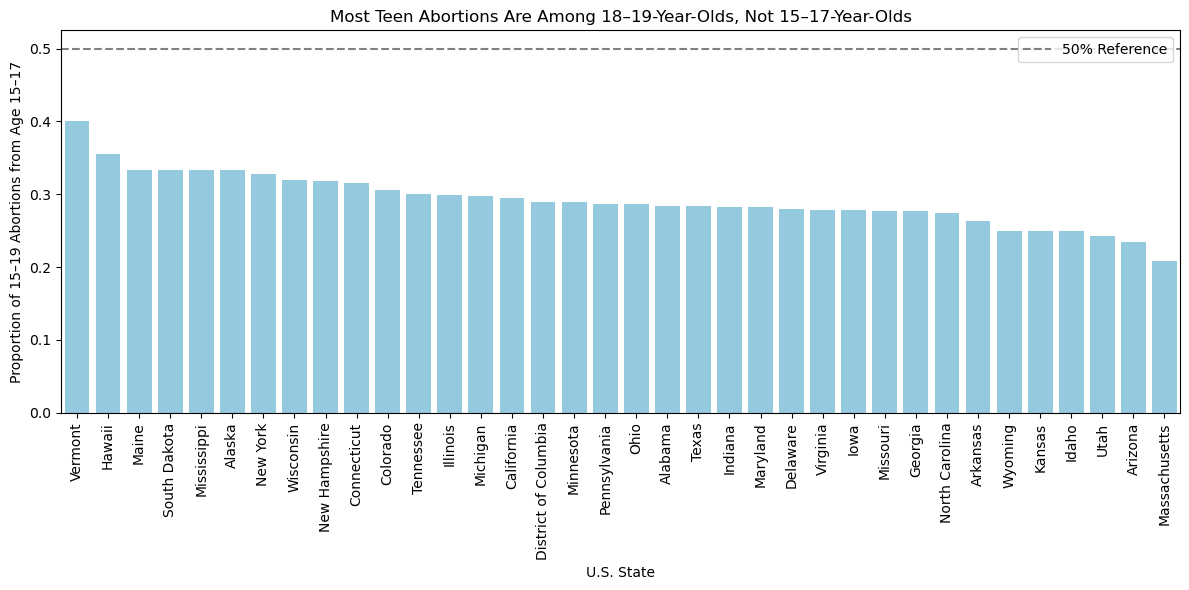

In [18]:


# Setup (assume the data has already been cleaned + renamed as shown earlier)
df['Abortions_15_17_ratio'] = df['Abortions_15_17'] / df['Abortions_15_19']

# Sort by ratio to show which states have the highest/lowest share of 15–17 abortions
df_sorted = df.sort_values(by='Abortions_15_17_ratio', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='U.S. State', y='Abortions_15_17_ratio', color='skyblue')
plt.axhline(0.5, color='gray', linestyle='--', label='50% Reference')
plt.xticks(rotation=90)
plt.ylabel('Proportion of 15–19 Abortions from Age 15–17')
plt.title('Most Teen Abortions Are Among 18–19-Year-Olds, Not 15–17-Year-Olds')
plt.legend()
plt.tight_layout()
plt.show()

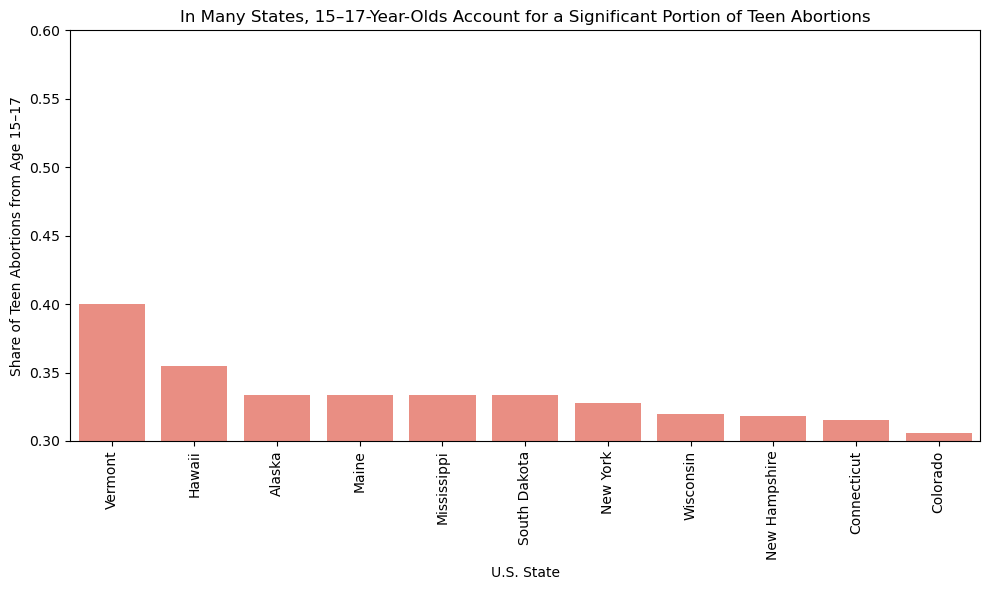

In [19]:
# Filter for states with higher 15–17 ratios (persuasive)
high_share = df[df['Abortions_15_17_ratio'] > 0.3].sort_values('Abortions_15_17_ratio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=high_share, x='U.S. State', y='Abortions_15_17_ratio', color='salmon')
plt.ylim(0.3, 0.6)  # Truncated y-axis to exaggerate differences
plt.xticks(rotation=90)
plt.ylabel('Share of Teen Abortions from Age 15–17')
plt.title('In Many States, 15–17-Year-Olds Account for a Significant Portion of Teen Abortions')
plt.tight_layout()
plt.show()

In [20]:
df = df.rename(columns={
    'Total no. of publicly funded abortions , 2010': 'Public_Abortions_2010',
    'No. of abortions, by state of residence, 2020': 'Total_Abortions_2020'
})



In [21]:
df = df.rename(columns={
    'Total no. of publicly funded abortions , 2010': 'Public_Abortions_2010',
    'No. of abortions, by state of residence, 2020': 'Total_Abortions_2020'
})

In [22]:
df.replace(["unavailable", "N/A", "-", ""], np.nan, inplace=True)
#df['Public_Abortions_2010', 'Total_Abortions_2020'] = df['Public_Abortions_2010', 'Total_Abortions_2020'].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=['Public_Abortions_2010', 'Total_Abortions_2020'])

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Abortions_Total_2020', y='Abortions_15_19', scatter_kws={'s': 60}, line_kws={"color": "blue"})
plt.xlabel('Total Abortions by State (2020)')
plt.ylabel('Teen Abortions (Ages 15–19) by State (2017)')
plt.title('States With Higher Abortion Totals Also See More Teen Abortions')
plt.tight_layout()
plt.show()

KeyError: 'Abortions_Total_2020'

<Figure size 800x600 with 0 Axes>

In [24]:
# Normalize teen abortions by total abortions to break the trend
df['Teen_Ratio'] = df['Abortions_15_19'] / df['Abortions_Total_2020']

# Sort to emphasize the inconsistencies
df_sorted = df.sort_values('Teen_Ratio', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x='U.S. State', y='Teen_Ratio', palette='coolwarm')
plt.xticks(rotation=90)
plt.ylabel('Teen Abortions as a % of Total Abortions')
plt.title('Teen Abortions Vary Widely, Regardless of State’s Overall Abortion Rate')
plt.tight_layout()
plt.show()

KeyError: 'Abortions_Total_2020'

In [25]:
df['Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017']
df.replace("unavailable", np.nan, inplace=True)

# Drop rows with NaNs in specific columns you're using
df = df.dropna(subset=['Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017'])
df['Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017']
df['No. of abortions among women aged 18-19, by state of residence, 2017']


KeyError: 'No. of abortions among women aged 18-19, by state of residence, 2017'

In [26]:
#Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017

plAbortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017', y='No. of abortions among women aged 18-19, by state of residence, 2017', scatter_kws={'s': 70})t.figure(figsize=(10, 6))
sns.regplot(data=df, x='
plt.show()

SyntaxError: unterminated string literal (detected at line 3) (2825859718.py, line 3)

In [27]:
#sns.Plot(df, "Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017", "No. of abortions per 1,000 women aged 15–44, by state of residence, 2020", color="Country").add(so.Area(alpha=.7), so.Stack())

df.plot.area(x='Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017', y='No. of abortions among women aged 18-19, by state of residence, 2017', stacked =True)
#Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017', y='No. of abortions per 1,000 women aged 15–44, by state of residence, 2020', scatter_kws={'s': 70})

KeyError: 'No. of abortions among women aged 18-19, by state of residence, 2017'

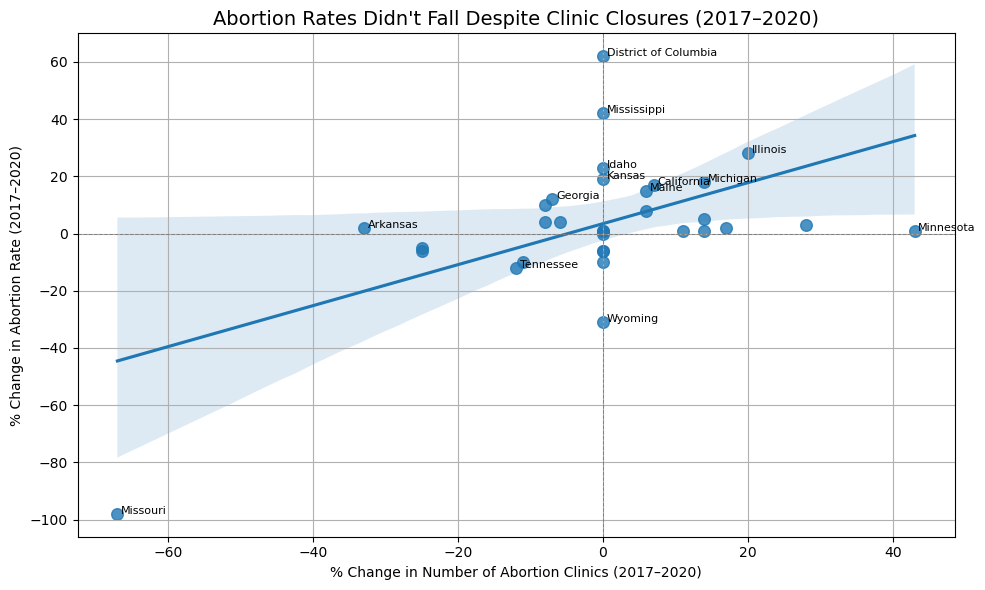

In [28]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Load dataset

# Clean and rename for simplicity
df = df.rename(columns={
    '% change in the no. of abortion clinics, 2017-2020': 'Clinic Change',
    '% change in abortion rate, 2017-2020': 'Rate Change',
    'U.S. State': 'State'
})

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['Clinic Change', 'Rate Change'])

# Plot: Supportive of proposition
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Clinic Change', y='Rate Change', scatter_kws={'s': 70})

# Annotate a few notable states
for i, row in df.iterrows():
    if abs(row['Clinic Change']) > 30 or abs(row['Rate Change']) > 10:
        plt.text(row['Clinic Change'] + 0.5, row['Rate Change'], row['State'], fontsize=8)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title("Abortion Rates Didn't Fall Despite Clinic Closures (2017–2020)", fontsize=14)
plt.xlabel("% Change in Number of Abortion Clinics (2017–2020)")
plt.ylabel("% Change in Abortion Rate (2017–2020)")
plt.grid(True)
plt.tight_layout()
plt.show()

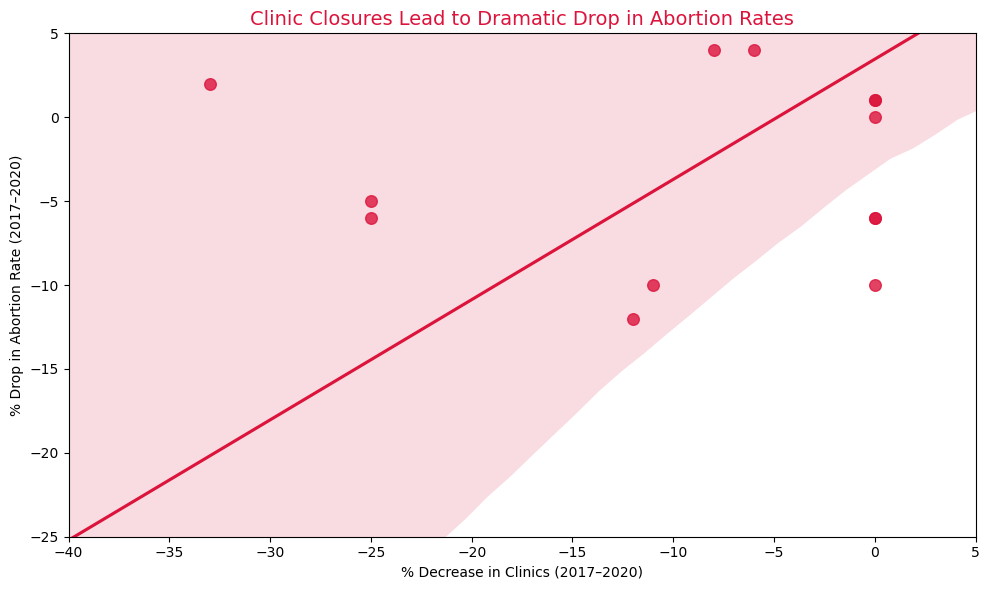

In [29]:
# Filter to just states with large clinic losses (deceptive)
#subset = df[df['Clinic Change'] < -10]

plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Clinic Change', y='Rate Change', scatter_kws={'s': 70}, color='crimson')

plt.title("Clinic Closures Lead to Dramatic Drop in Abortion Rates", fontsize=14, color='crimson')
plt.xlabel("% Decrease in Clinics (2017–2020)")
plt.ylabel("% Drop in Abortion Rate (2017–2020)")

# Deceptive axis limit to exaggerate effect
plt.ylim(-25, 5)
plt.xlim(-40, 5)

# Hide grid for cleaner look
plt.grid(False)
plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['U.S. State', '% change in abortion rate, 2017-2020',
       '% change in the no. of abortion clinics, 2017-2020',
       '% change in the no. of abortion providers, 2014-2017',
       '% of all U.S. abortions, by state of occurrence, 2020',
       '% of counties without a known abortion provider, 2014',
       '% of counties without a known clinic, 2020',
       '% of residents obtaining abortions who traveled out of state for care, 2020',
       '% of women aged 15-44 living in a county without a clinic, 2020',
       '% of women aged 15-44 living in a county without an abortion provider, 2014',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-17), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
       'Abortion rate (the no. of abortions per 1,000 women aged 18-19), by state of residence, 2017',
       'Change in the no. of abortion clinics, 2017-2020',
       'Change in th

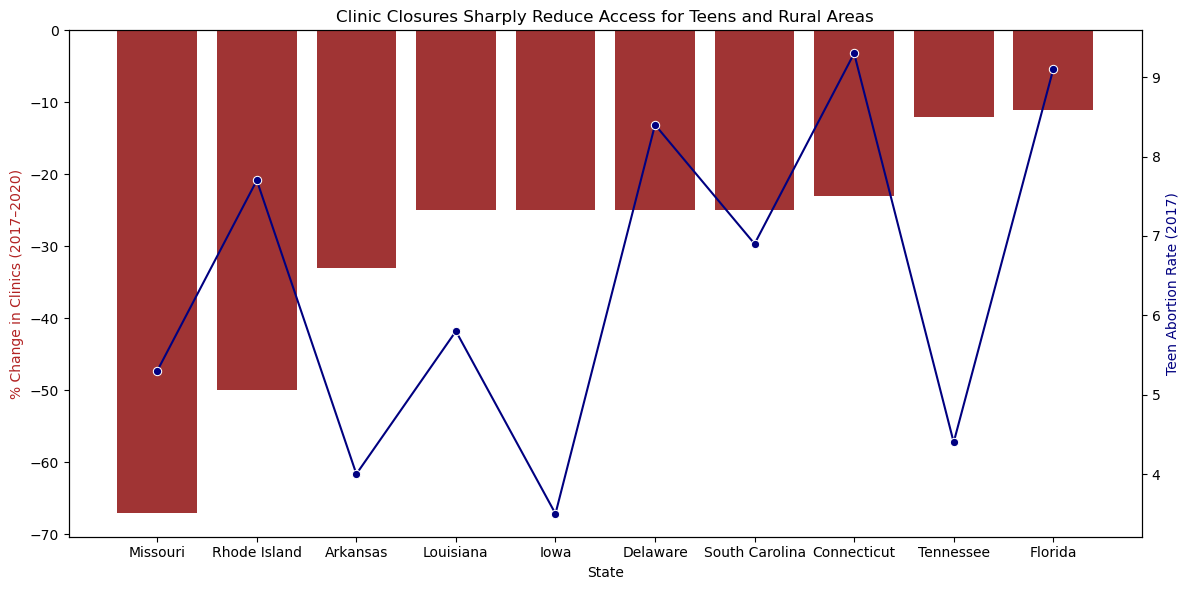

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
df['Teen_Abortions_Rate_Change'] = df['Abortions_15_19'] / df['Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017']

# Sort by clinic loss
df_sorted = df.sort_values('% change in the no. of abortion clinics, 2017-2020')

# Select top 10 states with largest negative % change in clinics
top_closure_states = df_sorted.head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(
    x='U.S. State', 
    y='% change in the no. of abortion clinics, 2017-2020',
    data=top_closure_states, 
    color='firebrick', 
    ax=ax1
)
ax1.set_ylabel('% Change in Clinics (2017–2020)', color='firebrick')
ax1.set_xlabel('State')
ax1.set_title('Clinic Closures Sharply Reduce Access for Teens and Rural Areas')

# Add teen abortion rate on a second y-axis
ax2 = ax1.twinx()
sns.lineplot(
    x='U.S. State', 
    y='Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
    data=top_closure_states, 
    sort=False,
    color='navy',
    marker='o',
    ax=ax2
)
ax2.set_ylabel('Teen Abortion Rate (2017)', color='navy')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

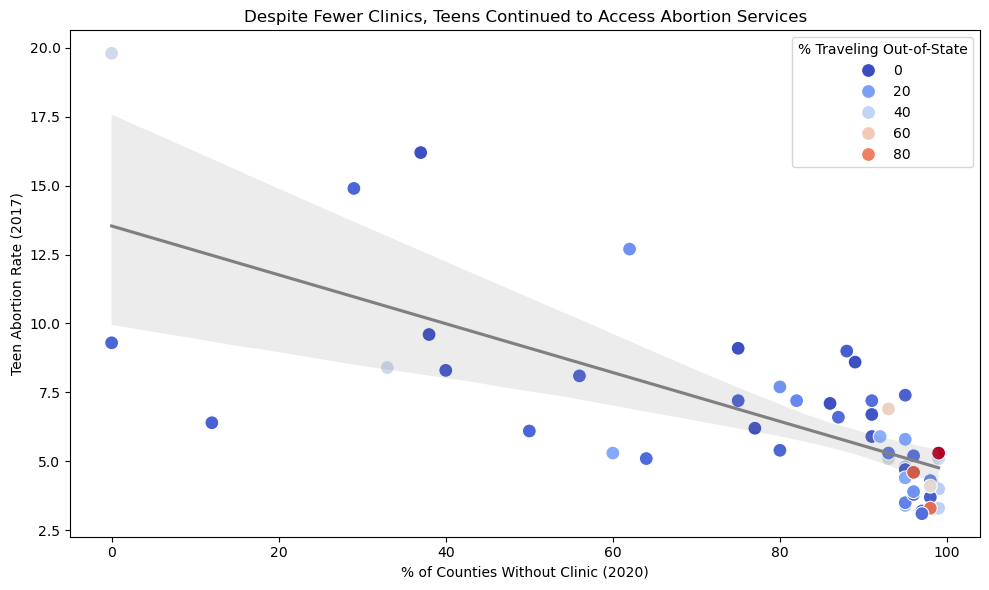

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='% of counties without a known clinic, 2020',
    y='Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
    hue='% of residents obtaining abortions who traveled out of state for care, 2020',
    data=df,
    palette='coolwarm',
    s=100
)

# Trend line (optional, visual guide)
sns.regplot(
    x='% of counties without a known clinic, 2020',
    y='Abortion rate (the no. of abortions per 1,000 women aged 15-19), by state of residence, 2017',
    data=df,
    scatter=False,
    color='gray',
   # linestyle='--'
)

plt.title("Despite Fewer Clinics, Teens Continued to Access Abortion Services")
plt.xlabel('% of Counties Without Clinic (2020)')
plt.ylabel('Teen Abortion Rate (2017)')
plt.legend(title='% Traveling Out-of-State')
plt.tight_layout()
plt.show()